In [98]:
# Milan Kovacs - 21308128, Caoimhe Cahill - 21331308
# The code runs to execution

In [99]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix


In [100]:
# Loading data from csv and printing it
dataset_path = 'phones.csv'
data = pd.read_csv(dataset_path)
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

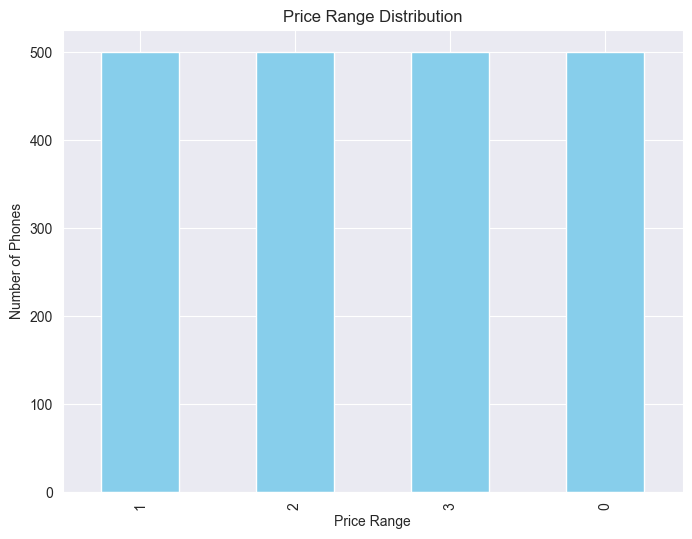

In [101]:
# Bar Chart graph shows there's no imbalance with the predication value in the dataset - no bias
# Count occurrences of each price range
price_range_counts = data['price_range'].value_counts()
plt.figure(figsize=(8, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.show()

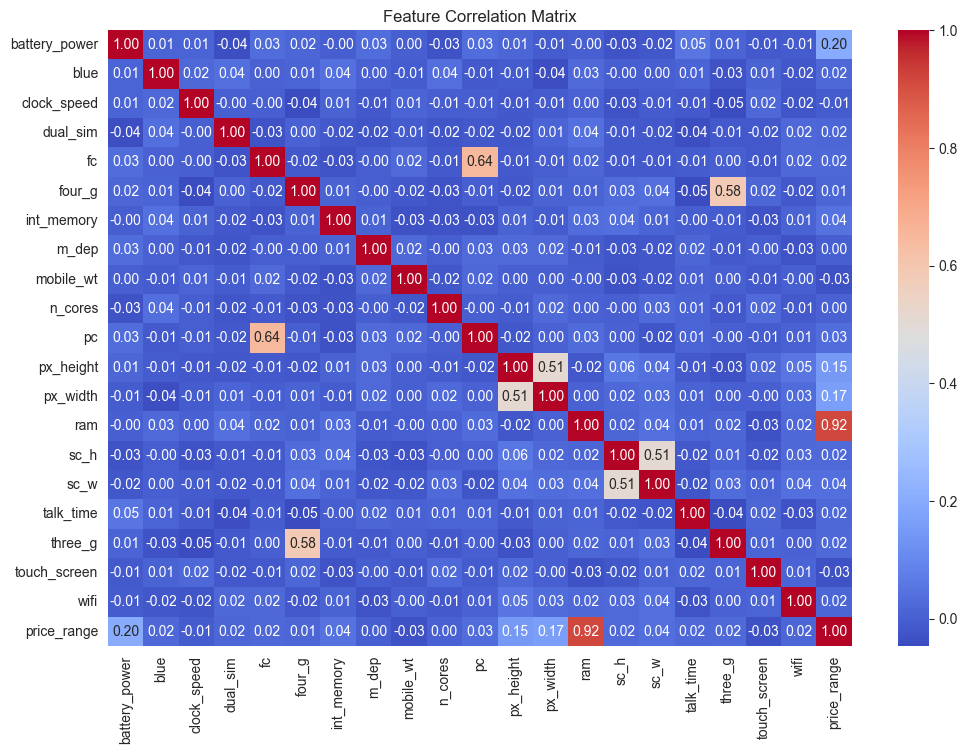

In [102]:
# Analyze feature correlations
"""
There is of features so we will use this correlation to decide what features to use 
- selecting features that correlate well with your target variable
- reduce noise
"""
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

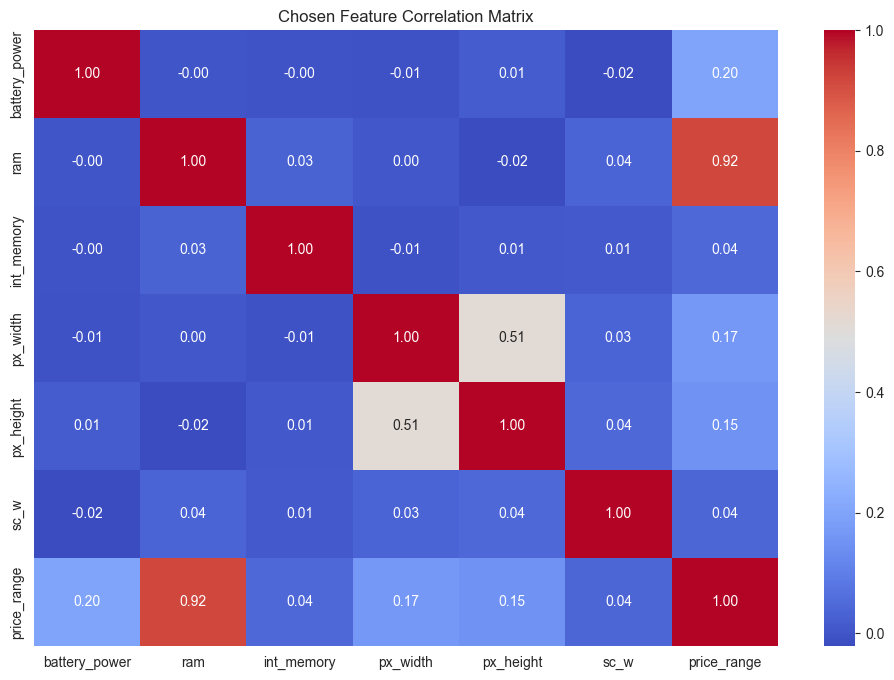

In [103]:
key_features = data[['battery_power', 'ram', 'int_memory', 'px_width', 'px_height', 'sc_w', 'price_range']]

corr_matrix = key_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Chosen Feature Correlation Matrix')
plt.show()

In [104]:
def split_and_normalise_data(k_folds=5):
    #Seperate features and target(prediction variable)
    X = data[['battery_power', 'ram', 'int_memory', 'px_width', 'px_height', 'sc_w']]#Features
    Y = data['price_range'] #Target(prediction variable)
    
    #Split data in training set and test set
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1.0 / k_folds, random_state=42)
    
    # Create a MinMaxScaler for normalisation
    scaler = MinMaxScaler()
    
    # Fit Scaler on sets
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # Print shapes and the first few rows of the datasets
    print(f"x_train shape: {x_train.shape}")
    print(f"x_test shape: {x_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    return x_train, x_test, y_train, y_test

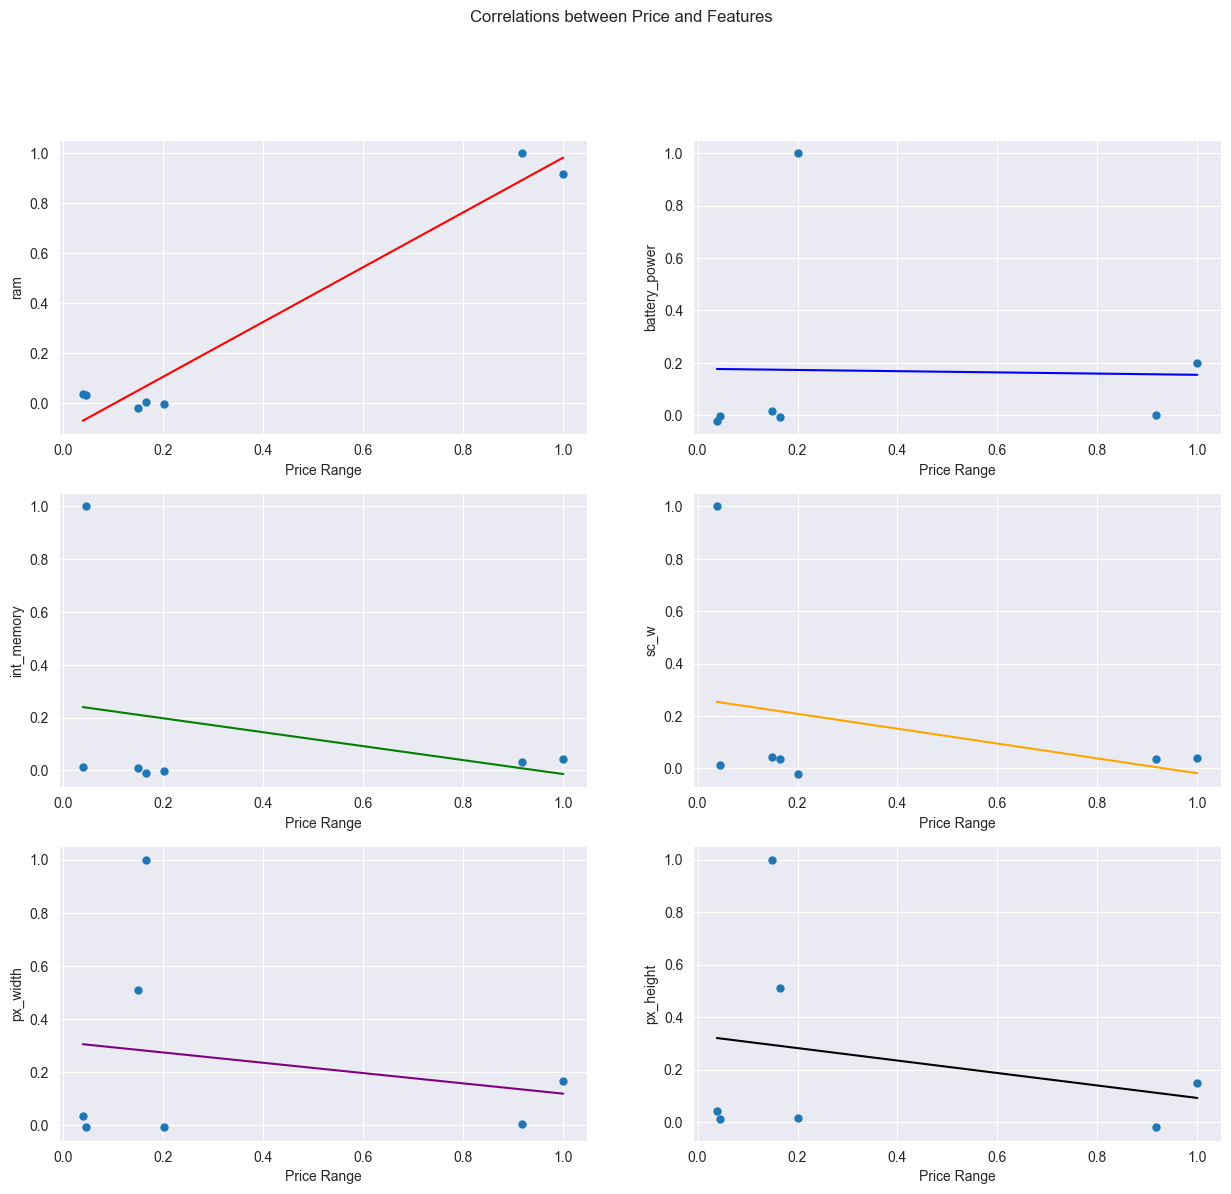

'\n    The results shows the line of best fit for the correlation between the price ranges and the features.\n    While from the correlation matrix we deducted that RAM has a strong positive correlation, we can visually see that\n    the points are relatively close to the line (as contrast to the other features). \n'

In [105]:
# Correlation between the prices and the features
# https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/

# Multiple Subplots
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axis = plt.subplots(3,2)       # 3 rows, 2 columns
fig.suptitle('Correlations between Price and Features')
fig.set_figheight(13)
fig.set_figwidth(15)

# Take the features we will be plotting against price
price =         corr_matrix['price_range']
ram =           corr_matrix['ram']
batter_power =  corr_matrix['battery_power']
int_memory =    corr_matrix['int_memory']
px_width =      corr_matrix['px_width']
px_height =     corr_matrix['px_height']
sc_w =          corr_matrix['sc_w']

data_sets = [ram, batter_power, int_memory, sc_w, px_width, px_height]
colours = ['red', 'blue', 'green', 'orange', 'purple', 'black']
marker_size = 25
marker_symbol = 'o'

i = 0
for row in range(3):
    for col in range(2):
        data_being_plotted = data_sets[i] # Which data to plot
        plot = axis[row, col]             # Mapped to which plot
        
        plot.scatter(price, data_being_plotted, marker=marker_symbol, s=marker_size)    # Place the markers
        plot.plot(np.unique(price), np.poly1d(np.polyfit(price, data_being_plotted, 1)) # Line of best fit from GeeksForGeeks
         (np.unique(price)), color=colours[i])

        plot.set(xlabel='Price Range', ylabel=f'{data_being_plotted.name}')
        i += 1

plt.show()

"""
    The results shows the line of best fit for the correlation between the price ranges and the features.
    While from the correlation matrix we deducted that RAM has a strong positive correlation, we can visually see that
    the points are relatively close to the line (as contrast to the other features). 
"""


In [106]:
"""
    To Dynamically run the model, this class takes in parameters that use some hardcoded values based on our dataset (such as the default first layer being 6 in LAYERS)
    
    The class takes 
        LAYERS - Which is a list of layers excluding the last layer
        EPOCH - The number of iterations to train the model with our training data
        MINI_BATCH_SIZE - The size of the mini-batches that will be used to update the weights
        VERBOSE - Whether or not to display training and epoch values
        NUMBER_OF_CLASSIFICATIONS - The number correlating to the output layer, IE the number of classes we can classify our input into
        ACTIVATION_FUNCTION - Activation function used in the hidden layers
        LOSS_FUNCTION - Loss function to calculate the error
        
    Influenced by
    http://neuralnetworksanddeeplearning.com/chap1.html 
    ~ Michael Nielsen 2019
"""

class ClassificationMultiLayerPerceptron:    
    def __init__(self, 
                 LAYERS = [6], 
                 EPOCH = 40, 
                 MINI_BATCH_SIZE = 10, 
                 VERBOSE = 1, 
                 NUMBER_OF_CLASSIFICATIONS = 4, 
                 ACTIVATION_FUNCTION = 'relu', 
                 LOSS_FUNCTION = 'sparse_categorical_crossentropy'):
        self.MODEL = None
        self.CF_TRAINING = None
        self.CF_TESTING = None
        self.EPOCH = EPOCH
        self.MINI_BATCH_SIZE = MINI_BATCH_SIZE
        self.VERBOSE = VERBOSE
        self.NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS
        self.ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
        self.LAYERS = LAYERS
        self.LOSS_FUNCTION = LOSS_FUNCTION
        
        self.create_layers()
        
    """
        Generate the layers for the model
    """
    def create_layers(self):
        input_layer = self.LAYERS[0]
        
        # Add first layer
        self.MODEL = tf.keras.models.Sequential([
            keras.layers.Input(shape=(input_layer,)),
        ])
        
        # Add the hidden layers if provided (again the output should not be provided)
        for layer in self.LAYERS[1:]:
            self.MODEL.add(keras.layers.Dense(layer, activation=self.ACTIVATION_FUNCTION))
        
        # Add the output layer
        self.MODEL.add(keras.layers.Dense(self.NUMBER_OF_CLASSIFICATIONS, activation='softmax'))
            

    """
        Returns the summary generated by tf.keras.models.Sequential
    """
    def get_summary(self):
        self.MODEL.summary()
        
    """
        It is the compile function in tf.keras which takes:
            OPTIMIZER - The optimiser to use
            LOSS_FUNCTION - The loss function to use
            METRICS - List of metrics to use
    """
    def compile(self, OPTIMIZER = 'SGD', LOSS_FUNCTION = 'sparse_categorical_crossentropy', METRICS = [ 'accuracy' ]):
        self.MODEL.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=METRICS)
    
    """
        Takes two tuples of training and validation sets
    """
    def fit(self, training=None, testing=None):
        self.HISTORY = self.MODEL.fit(training[0], training[1], epochs=self.EPOCH, batch_size=self.MINI_BATCH_SIZE, verbose=self.VERBOSE, validation_data=testing)

    """
        Returns the history of the model metrics
        This is used to generate the confusion matrix and the comparison plots
    """
    def get_history(self):
        return self.HISTORY

    """
        Based on the model history, we can plot the accuracy and loss over epochs
    """
    def plot_history(self):
        mdl_training_results = self.get_history()
        accuracy = [result * 100 for result in mdl_training_results.history['accuracy']]
        validation_accuracy = [result * 100 for result in mdl_training_results.history['val_accuracy']]
        loss = mdl_training_results.history['loss']
        validation_loss = mdl_training_results.history['val_loss']
        
        plt.title('model accuracy')
        plt.plot(accuracy, label='accuracy as %')
        plt.plot(validation_accuracy, label='validation accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['training set', 'validation set'], loc='upper left')
        plt.figure(figsize=(100, 100))
        
        plt.show()
        
        plt.title('loss function')
        plt.plot(loss, label='loss')
        plt.plot(validation_loss, label='loss value')
        plt.ylabel('validation loss')
        plt.xlabel('epoch')
        plt.legend(['training set', 'validation set'], loc='upper right')
        plt.figure(figsize=(100, 100))
        
        plt.show()
    
    """
        Modified version of:
        https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    """
    def generate_confusion_matrix(self, training=None, testing=None):        
        y_train_pred = self.MODEL.predict(training[0])
        y_train_classes = y_train_pred.argmax(axis=-1) # Number of classifications of the last layer
        cf_training = confusion_matrix(training[1], y_train_classes)
        self.CF_TRAINING = cf_training
    
        if testing is not None:
            y_test_pred = self.MODEL.predict(testing[0])
            y_test_classes = y_test_pred.argmax(axis=-1)
            cf_testing = confusion_matrix(testing[1], y_test_classes)
            self.CF_TESTING = cf_testing
    
    """
        Modified version of: 
        https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
        by Dennis T
    """
    def plot_confusion_matrix(self):
        if self.CF_TESTING is not None: # If testing set is provided we will do two subplots
            fig, axis = plt.subplots(1,2) 
            data_sets = [self.CF_TRAINING, self.CF_TESTING]  
        else:
            fig, axis = plt.subplots(1,1) # Otherwise we will do just one on the training
            data_sets = [self.CF_TRAINING]
            axis = [axis]
    
        fig.suptitle('Confusion Matrices')
        fig.set_figheight(8)
        fig.set_figwidth(16)
        
        for i in range(len(data_sets)):
            data_being_plotted = data_sets[i]
            plot = axis[i]
            sns.heatmap(data_being_plotted, annot=True, cmap='copper', fmt='d', ax=plot)
            plot.set(xlabel='Predicted', ylabel='Actual')
            plot.set_title('Training Set' if i == 0 else 'Testing')
        
        plt.show()
        
        # If validation set is provided we will merge the two matrices for a total classification confusion matrix
        if model.CF_TESTING is None:
            return 
            
        total_cf = model.CF_TRAINING + model.CF_TESTING
        plt.figure(figsize=(7, 5))
        plt.title('Combined Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        
        # Add names for each cell, where we display the number of elements and the % of the total
        group_counts = ['{0:0.0f}'.format(value) for value in total_cf.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in total_cf.flatten()/np.sum(total_cf)]
        
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)] # Format the two labels 
        labels = np.asarray(labels).reshape(4,4) # Turn the 1D list into a 4x4 matrix (because we have 4 classifications)
        
        sns.heatmap(total_cf, annot=labels, fmt='', cmap='copper')
        



x_train shape: (1600, 6)
x_test shape: (400, 6)
y_train shape: (1600,)
y_test shape: (400,)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 18)             │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 4)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (808.00 B)

 Trainable params: 202 (808.00 B)

 Non-trainable params: 0 (0.00 B)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


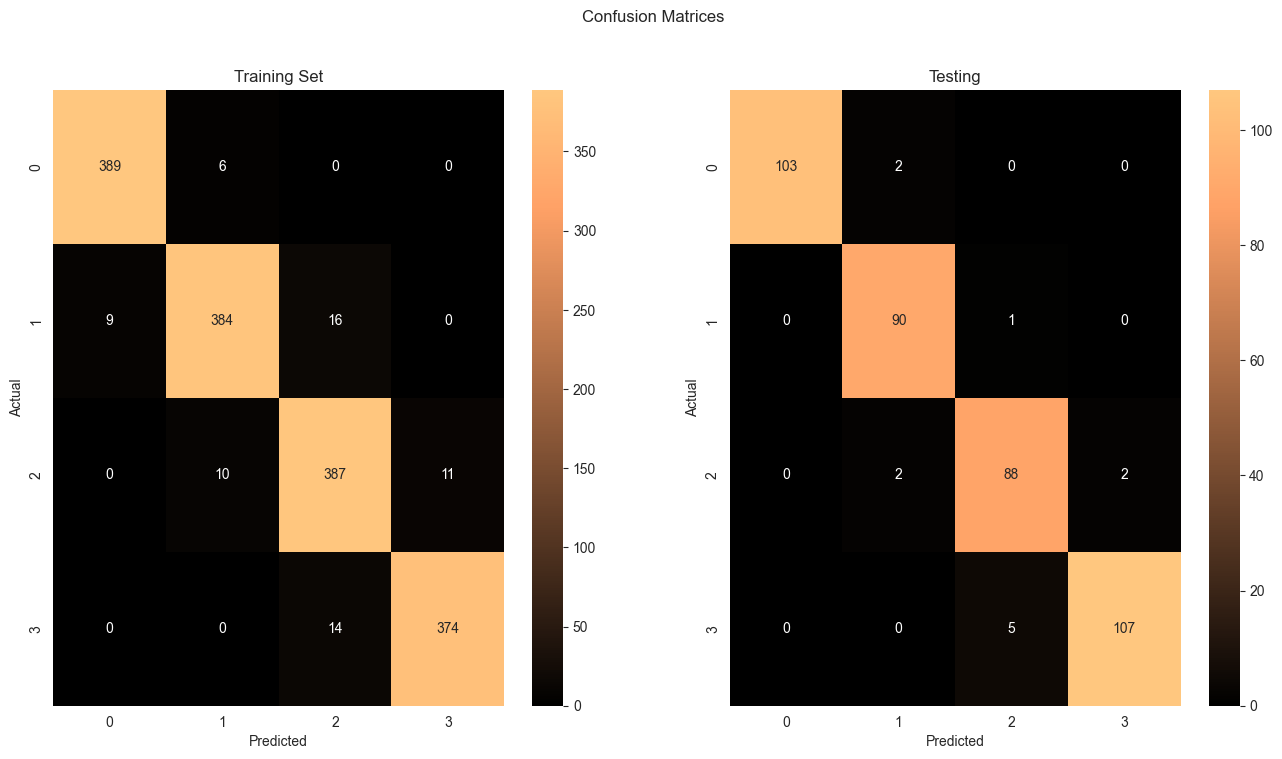

'\n    The confusion matrix is a 4x4 to demonstrate the classification of each input, their actual classification against the predicted.\n    The diagonal represents the True Positives, where the model correctly classified the input \n        (0 classed in 0, 1 classed in 1, etc)\n    The values above the diagonal are False Negatives, where the model predicted to belong in a different class than where they actually belonged. \n        (0 classed in 1, 2, 3. Looking at the row)\n    Values below the diagonal are False Positives, where the outputs belonged in a different class yet predicted incorrectly. \n        (1, 2, 3 classed into 0. Looking at the column)\n'

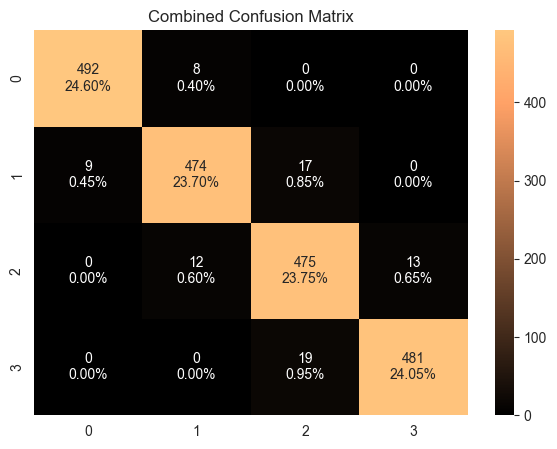

In [107]:
LEARNING_RATE = 0.001
EPOCH = 40  
MINI_BATCH_SIZE = 10
VERBOSE = 0
NUMBER_OF_CLASSIFICATIONS = 4
ACTIVATION_FUNCTION = 'relu'

x_train, x_test, y_train, y_test = split_and_normalise_data(5)

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model = ClassificationMultiLayerPerceptron(
    LAYERS = [6, 18],
    EPOCH = EPOCH,
    MINI_BATCH_SIZE = MINI_BATCH_SIZE,
    VERBOSE = VERBOSE,
    NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
    ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
)

model.get_summary()

model.compile(OPTIMIZER=adam_optimizer, LOSS_FUNCTION='sparse_categorical_crossentropy', METRICS = ['accuracy'])

model.fit(training=(x_train, y_train), testing=(x_test, y_test))

model.generate_confusion_matrix(training=(x_train, y_train), testing=(x_test, y_test))
model.plot_confusion_matrix()

"""
    The confusion matrix is a 4x4 to demonstrate the classification of each input, their actual classification against the predicted.
    The diagonal represents the True Positives, where the model correctly classified the input 
        (0 classed in 0, 1 classed in 1, etc)
    The values above the diagonal are False Negatives, where the model predicted to belong in a different class than where they actually belonged. 
        (0 classed in 1, 2, 3. Looking at the row)
    Values below the diagonal are False Positives, where the outputs belonged in a different class yet predicted incorrectly. 
        (1, 2, 3 classed into 0. Looking at the column)
"""

In [108]:
# Comparing Different Optimisers 
optimisers = [
    tf.keras.optimizers.Adadelta(),
    tf.keras.optimizers.Adafactor(),
    tf.keras.optimizers.Adagrad(),
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.AdamW(),
    tf.keras.optimizers.Adamax(),
    tf.keras.optimizers.Ftrl(),
    tf.keras.optimizers.Lion(),
    tf.keras.optimizers.LossScaleOptimizer(tf.keras.optimizers.Adam()),
    tf.keras.optimizers.Nadam(),
    tf.keras.optimizers.RMSprop(),
    tf.keras.optimizers.SGD(),
]
optim_results = []

# Constants
EPOCH = 40  
MINI_BATCH_SIZE = 10
VERBOSE = 0
NUMBER_OF_CLASSIFICATIONS = 4
ACTIVATION_FUNCTION = 'relu'
LOSS_FUNCTION='sparse_categorical_crossentropy'

for optimiser in optimisers:
    model = ClassificationMultiLayerPerceptron(
        LAYERS = [6, 18],
        EPOCH = EPOCH,
        MINI_BATCH_SIZE = MINI_BATCH_SIZE,
        VERBOSE = VERBOSE,
        NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
        ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
    )

    model.compile(OPTIMIZER=optimiser, LOSS_FUNCTION=LOSS_FUNCTION, METRICS = ['accuracy'])
    
    model.fit(training=(x_train, y_train), testing=(x_test, y_test))
    
    optim_results.append(model.get_history().history['val_accuracy'][-1])

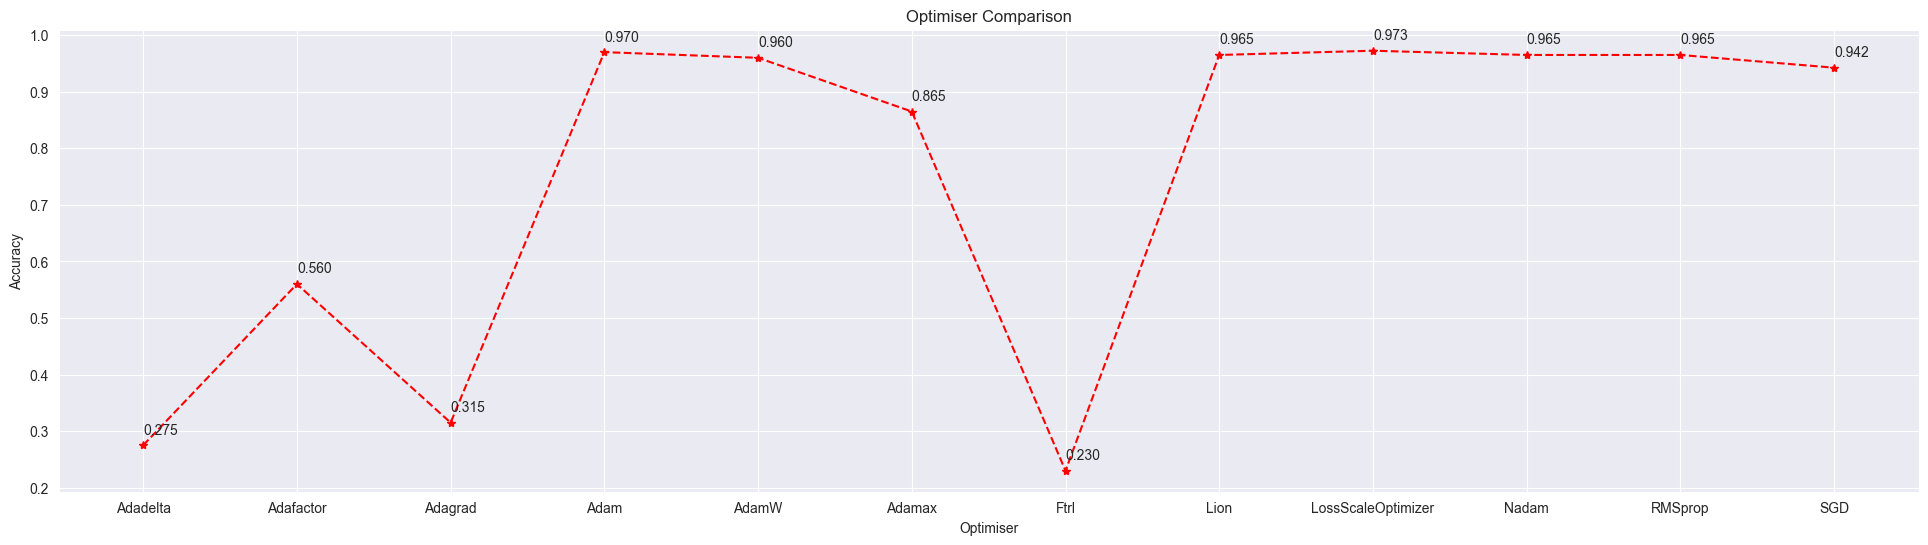

In [109]:
# Plot the results
optimiser_names = [optimiser.__class__.__name__ for optimiser in optimisers]
plt.figure(figsize=(24, 6))
plt.plot(optimiser_names, optim_results, marker='*', linestyle='--', color='red')
plt.title('Optimiser Comparison')
plt.xlabel('Optimiser')
plt.ylabel('Accuracy')
plt.grid(True)
for i,j in zip(optimiser_names,optim_results):
    plt.annotate('%.3f' % j, xy=(i, j + 0.02))
plt.show()


In [110]:
# Comparing Different Loss Functions
loss_functions = [
    tf.keras.losses.MeanSquaredError(),
    tf.keras.losses.MeanAbsoluteError(),
    tf.keras.losses.MeanSquaredLogarithmicError(),
    tf.keras.losses.SparseCategoricalCrossentropy(),
    tf.keras.losses.Poisson(),
    tf.keras.losses.LogCosh(),
    tf.keras.losses.MeanAbsolutePercentageError(),
    tf.keras.losses.SquaredHinge(),
]
loss_results = []

# Constants
EPOCH = 40  
MINI_BATCH_SIZE = 10
VERBOSE = 0
NUMBER_OF_CLASSIFICATIONS = 4
ACTIVATION_FUNCTION = 'relu'
OPTIMIZER='adam'

for loss_function in loss_functions:
    model = ClassificationMultiLayerPerceptron(
        LAYERS = [6, 18],
        EPOCH = EPOCH,
        MINI_BATCH_SIZE = MINI_BATCH_SIZE,
        VERBOSE = VERBOSE,
        NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
        ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
    )

    model.compile(OPTIMIZER=OPTIMIZER, LOSS_FUNCTION=loss_function, METRICS = ['accuracy'])
    
    model.fit(training=(x_train, y_train), testing=(x_test, y_test))
    
    loss_results.append(model.get_history().history['val_accuracy'][-1])


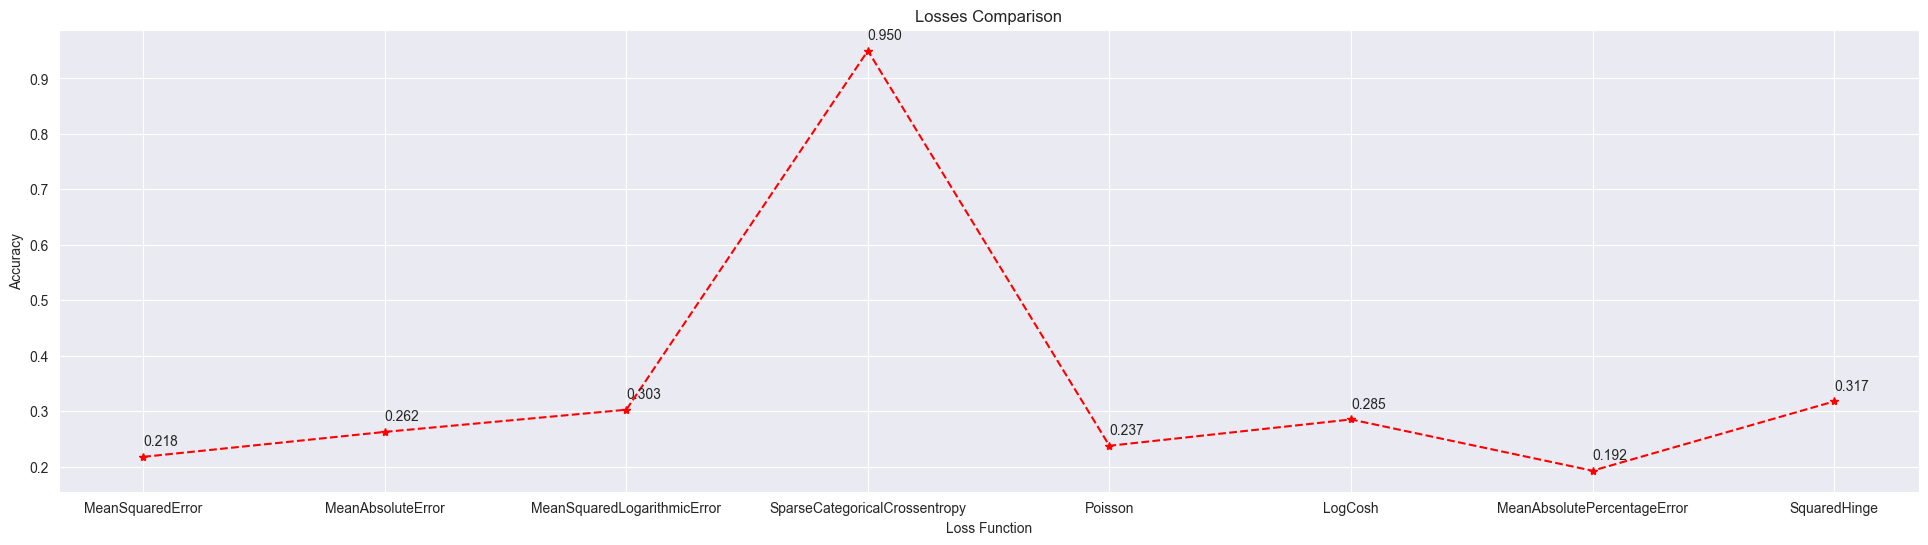

In [112]:
loss_names = [loss_function.__class__.__name__ for loss_function in loss_functions]
plt.figure(figsize=(24, 6))
plt.plot(loss_names, loss_results, marker='*', linestyle='--', color='red')
plt.title('Losses Comparison')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.grid(True)

for i,j in zip(loss_names,loss_results):
    plt.annotate('%.3f' % j, xy=(i, j + 0.02))
plt.show()

In [113]:
accuracies = []
 
for i in range(2,11): 
    LEARNING_RATE = 0.001
    EPOCH = 40  
    MINI_BATCH_SIZE = 10
    VERBOSE = 0
    NUMBER_OF_CLASSIFICATIONS = 4
    ACTIVATION_FUNCTION = 'relu'
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    
    model = ClassificationMultiLayerPerceptron(
        LAYERS = [6, 18],
        EPOCH = EPOCH,
        MINI_BATCH_SIZE = MINI_BATCH_SIZE,
        VERBOSE = VERBOSE,
        NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
        ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
    )
    
    print("K-Fold Test: ", i)
    x_train, x_test, y_train, y_test = split_and_normalise_data(i)
    
    model.compile(OPTIMIZER=adam_optimizer, LOSS_FUNCTION='sparse_categorical_crossentropy', METRICS = ['accuracy'])
    
    model.fit(training=(x_train, y_train), testing=(x_test, y_test))

    accuracies.append(model.get_history().history['val_accuracy'][-1])
    

K-Fold Test:  2
x_train shape: (1000, 6)
x_test shape: (1000, 6)
y_train shape: (1000,)
y_test shape: (1000,)
K-Fold Test:  3
x_train shape: (1333, 6)
x_test shape: (667, 6)
y_train shape: (1333,)
y_test shape: (667,)
K-Fold Test:  4
x_train shape: (1500, 6)
x_test shape: (500, 6)
y_train shape: (1500,)
y_test shape: (500,)
K-Fold Test:  5
x_train shape: (1600, 6)
x_test shape: (400, 6)
y_train shape: (1600,)
y_test shape: (400,)
K-Fold Test:  6
x_train shape: (1666, 6)
x_test shape: (334, 6)
y_train shape: (1666,)
y_test shape: (334,)
K-Fold Test:  7
x_train shape: (1714, 6)
x_test shape: (286, 6)
y_train shape: (1714,)
y_test shape: (286,)
K-Fold Test:  8
x_train shape: (1750, 6)
x_test shape: (250, 6)
y_train shape: (1750,)
y_test shape: (250,)
K-Fold Test:  9
x_train shape: (1777, 6)
x_test shape: (223, 6)
y_train shape: (1777,)
y_test shape: (223,)
K-Fold Test:  10
x_train shape: (1800, 6)
x_test shape: (200, 6)
y_train shape: (1800,)
y_test shape: (200,)


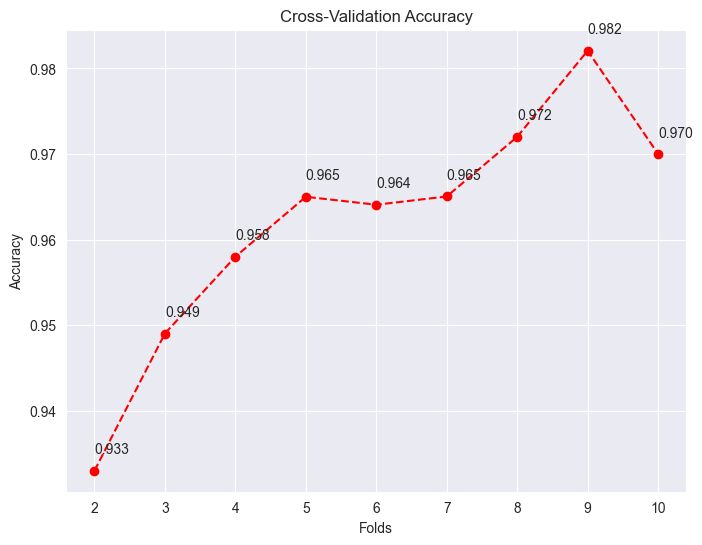

In [116]:
plt.figure(figsize=(8, 6))
plt.plot(list(range(2,11)), accuracies, marker='o', linestyle='--', color='red')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.grid(True)

for i,j in zip(list(range(2,11)), accuracies):
    plt.annotate('%.3f' % j, xy=(i, j+0.002))
    
plt.show()